In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# ipython nbconvert --to pdf notebook.ipynb
#jupyter notebook \ --NotebookApp.allow_origin='https://colab.research.google.com' \ --port=8888 \ --NotebookApp.port_retries=0
# load dataset into Pandas DataFrame
Data = pd.read_csv('haberman.csv', names=['Age','Operation_Year','Auxilary_nodes','Survival_status'])
'''Data loaded without erroes'''
# %timeit - to find out the time the command took

'Data loaded without erroes'

In [2]:
Data.head()

,Age,Operation_Year,Auxilary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
Data.shape  #Data points and Features

(306, 4)

In [4]:
Data.columns  #Column names in the dataset

Index(['Age', 'Operation_Year', 'Auxilary_nodes', 'Survival_status'], dtype='object')

In [5]:

'''Here we have two classes:
 1 - People who survived for 5 or more years after the operation
 2 - People who died withiin 5 of the operation'''

print(Data['Survival_status'].value_counts())

1    225
2     81
Name: Survival_status, dtype: int64


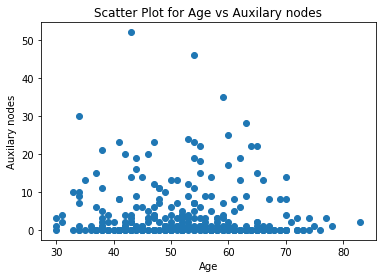

In [6]:
#Scatter Plot
#plt.scatter('Age','Survival_status')
plt.scatter(x=Data['Age'],y=Data['Auxilary_nodes'])
plt.title("Scatter Plot for Age vs Auxilary nodes")
plt.xlabel("Age")
plt.ylabel("Auxilary nodes")
plt.show()

#The Plot here represents the relation between age and auxilary nodes. There is not much of information here as the points seems to be random.

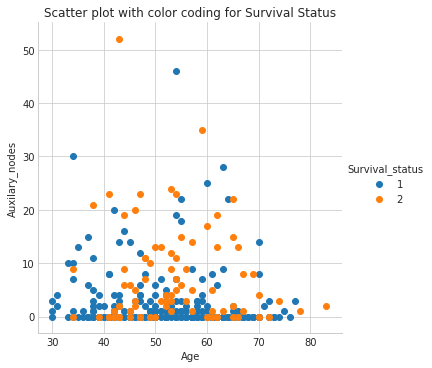

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(Data, hue="Survival_status", size=5).map(plt.scatter, "Age","Auxilary_nodes" ) \
   .add_legend();
plt.title("Scatter plot with color coding for Survival Status")
plt.show();

#The Plot here represents the relation between age and auxilary nodes with color coding representing the Survival Status. Again the points seems to be random here as it is basically the same plot as the one above.

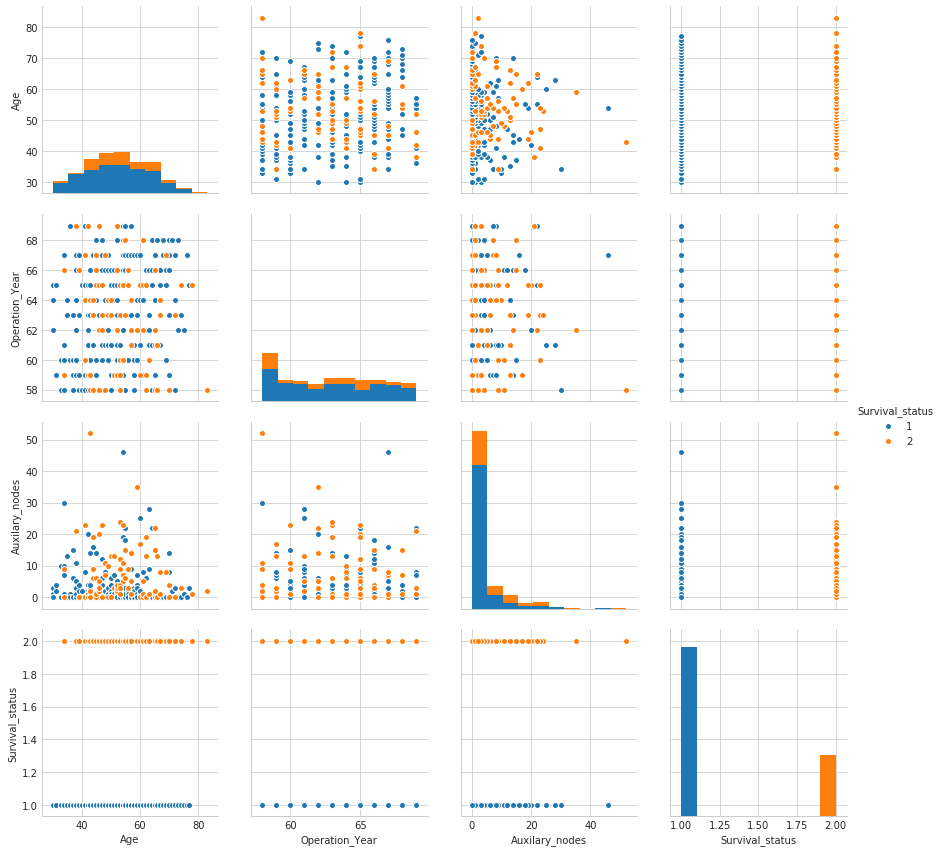

In [8]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Data, hue="Survival_status", size=3)
plt.show()

#Their is no clear relation between the features to classify the results properly.

#This is a pairplot , it plots a chart between all the features present. Here we are getting close to no information from this plot.

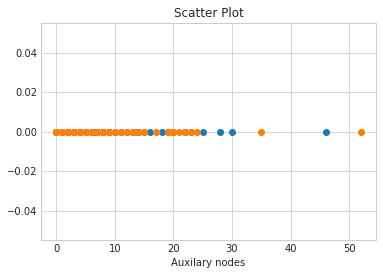

In [9]:
#1D scatter plot

Data_1 = Data.loc[Data["Survival_status"] == 1];
Data_2 = Data.loc[Data["Survival_status"] == 2];

plt.plot(Data_1["Auxilary_nodes"], np.zeros_like(Data_1["Auxilary_nodes"]), 'o')
plt.plot(Data_2["Auxilary_nodes"], np.zeros_like(Data_2["Auxilary_nodes"]), 'o')
plt.title("Scatter Plot")

plt.xlabel("Auxilary nodes")
plt.show()
#print(Data_1)
#of not much help as their is no clear distinction

#This is a 1D plot , shows mainly the auxilary nodes are less than 30 .

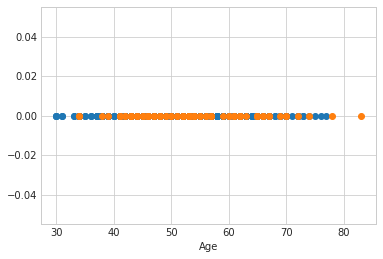

In [10]:
#1D scatter plot

Data_1 = Data.loc[Data["Survival_status"] == 1];
Data_2 = Data.loc[Data["Survival_status"] == 2];

plt.plot(Data_1["Age"], np.zeros_like(Data_1["Age"]), 'o')
plt.plot(Data_2["Age"], np.zeros_like(Data_2["Age"]), 'o')
plt.xlabel("Age")
plt.show()
#print(len(Data_1))
# of not much help as their is no clear distinction

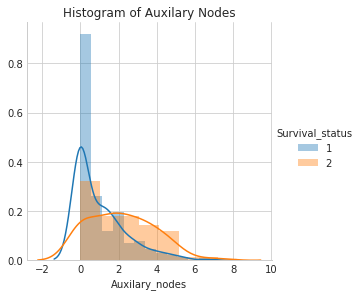

In [11]:
import warnings
warnings.filterwarnings("ignore")
Data_test = Data.copy()

Data_test['Auxilary_nodes'] = np.sqrt(Data['Auxilary_nodes'])
sns.FacetGrid(Data_test, hue="Survival_status", size=4).map(sns.distplot, "Auxilary_nodes") \
   .add_legend();
plt.title("Histogram of Auxilary Nodes")
plt.show();
# It shows that the survival rate is usually higher for people with 0 Aux_nodes , still the 
# classification is not that clear or concrete.

#This is a histogram , it shows that the survival rate is usually higher for people with 0 Aux_nodes

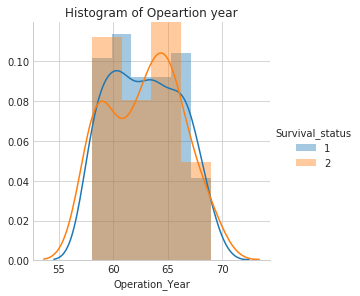

In [12]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(Data, hue="Survival_status", size=4) \
   .map(sns.distplot, "Operation_Year") \
   .add_legend();
plt.title("Histogram of Opeartion year")
plt.show();
# Doesn't tell much.

#This plot doesn't tell us much.

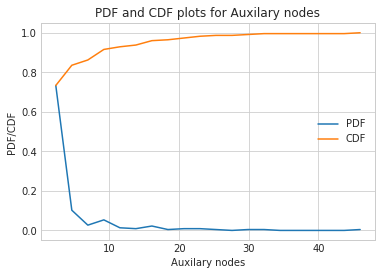

In [13]:
#Plot CDF and PDF of Auxilary_nodes

counts, bin_edges = np.histogram(Data_1['Auxilary_nodes'], bins=20, density = True)
#print(counts)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF');
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.legend()
plt.title("PDF and CDF plots for Auxilary nodes")
plt.xlabel("Auxilary nodes")
plt.ylabel("PDF/CDF")
plt.show();


#This plot shows the PDF and CDF of Auxiliary nodes feature set. As we can see CDF has a maximun value of 1, the plot shows the general trend CDF and PDF plots follow. Most of the auxilary nodes(80-90 %) have a value of less than 20.

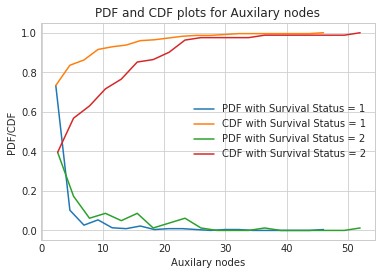

In [14]:
#Plot CDF and PDF of Auxilary_nodes for both classes Survival_status = 1 and 2.

#The PDF of really low Auxilary_nodes is very high.

counts, bin_edges = np.histogram(Data_1['Auxilary_nodes'], bins=20, density = True)
#print(counts)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF with Survival Status = 1');
plt.plot(bin_edges[1:], cdf,label='CDF with Survival Status = 1')


counts, bin_edges = np.histogram(Data_2['Auxilary_nodes'], bins=20, density = True)
#print(counts)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF with Survival Status = 2');
plt.plot(bin_edges[1:], cdf,label='CDF with Survival Status = 2')
plt.title("PDF and CDF plots for Auxilary nodes")
plt.xlabel("Auxilary nodes")
plt.ylabel("PDF/CDF")
plt.legend()
plt.show();

#This plot indicates that people with low auxilary nodes has a higher probability of surviving. 

In [15]:
#Mean , Std-deviation

print("Means: Auxilary Nodes")
print(np.mean(Data_1['Auxilary_nodes']))
#Mean with an outlier.
print(np.mean(np.append(Data_1['Auxilary_nodes'],100)));
print(np.mean(Data_2['Auxilary_nodes']))

print("\nStd-dev: Auxilary Nodes");
print(np.std(Data_1['Auxilary_nodes']))
print(np.std(Data_2['Auxilary_nodes']))





Means: Auxilary Nodes
2.7911111111111113
3.2212389380530975
7.45679012345679

Std-dev: Auxilary Nodes
5.857258449412131
9.128776076761632


In [16]:
#Median, Quantiles, Percentiles, IQR.


print("Medians : Auxilary Nodes")
print(np.median(Data_1['Auxilary_nodes']))
#Median with an outlier.
print(np.median(np.append(Data_1['Auxilary_nodes'],100)));
print(np.median(Data_2['Auxilary_nodes']))

print("\nQuantiles : Auxilary Nodes");
print(np.percentile(Data_1['Auxilary_nodes'],np.arange(0, 100, 25)))
print(np.percentile(Data_2['Auxilary_nodes'],np.arange(0, 100, 25)))

print(np.percentile(Data_1['Age'],np.arange(0, 100, 25)))
print(np.percentile(Data_2['Age'],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation : Auxilary Nodes")
print(robust.mad(Data_1['Auxilary_nodes']))
print(robust.mad(Data_2['Auxilary_nodes']))


Medians : Auxilary Nodes
0.0
0.0
4.0

Quantiles : Auxilary Nodes
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
[30. 43. 52. 60.]
[34. 46. 53. 61.]

Median Absolute Deviation : Auxilary Nodes
0.0
5.930408874022408


In [17]:
Data_test = Data[Data['Auxilary_nodes']==0]

In [18]:
for i in range(9):
    Data_test = Data[Data['Auxilary_nodes']<=i]
    count  = Data_test['Survival_status'].value_counts()
    print("Survival percentage for people with ",i," Auxilary_nodes")
    print((count[1]/sum(count))*100,end="\n")
    print(count)
    
# The number of people is highest for Auxilary_nodes ==0 , and it also tells us that people 
# with 0 Auxilary_nodes have a high chance of survival. Auxilary_nodes == 1 also has a high 
# survival rate but for others there is not enough data to make predictions.

Survival percentage for people with  0  Auxilary_nodes
86.02941176470588
1    117
2     19
Name: Survival_status, dtype: int64
Survival percentage for people with  1  Auxilary_nodes
84.7457627118644
1    150
2     27
Name: Survival_status, dtype: int64
Survival percentage for people with  2  Auxilary_nodes
83.75634517766497
1    165
2     32
Name: Survival_status, dtype: int64
Survival percentage for people with  3  Auxilary_nodes
82.02764976958525
1    178
2     39
Name: Survival_status, dtype: int64
Survival percentage for people with  4  Auxilary_nodes
81.73913043478261
1    188
2     42
Name: Survival_status, dtype: int64
Survival percentage for people with  5  Auxilary_nodes
80.50847457627118
1    190
2     46
Name: Survival_status, dtype: int64
Survival percentage for people with  6  Auxilary_nodes
79.83539094650206
1    194
2     49
Name: Survival_status, dtype: int64
Survival percentage for people with  7  Auxilary_nodes
79.60000000000001
1    199
2     51
Name: Survival_status

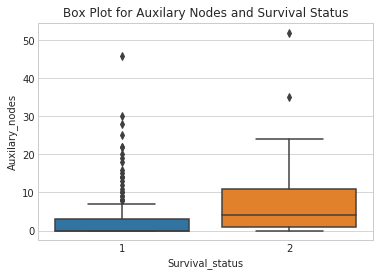

In [19]:
#Box-plot with whiskers:
# Around 90% people with Survival status = 1 has 8 or less Aux_nodes.
# We can see the medians  for Sur_status = 0 and for Sur_status = 2.
sns.boxplot(x='Survival_status',y='Auxilary_nodes', data=Data)
plt.title("Box Plot for Auxilary Nodes and Survival Status")
plt.show()

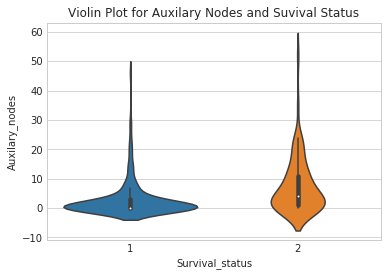

In [20]:
# A violin plot 
sns.violinplot(x='Survival_status',y='Auxilary_nodes', data=Data, size=8)
plt.title("Violin Plot for Auxilary Nodes and Suvival Status")
plt.show()

#It shows that the auxilary nodes with survival status = 1 are packed closely and with survival status = 2 are a bit widespread.

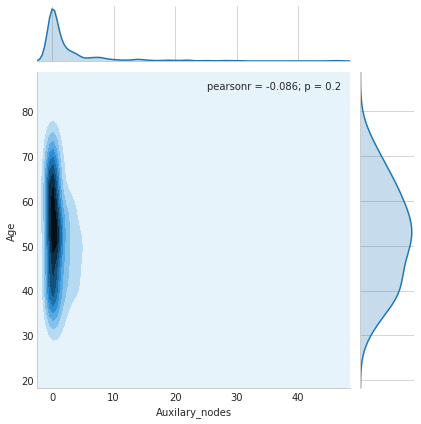

In [21]:
#2D Density plot, contors-plot
sns.jointplot(x="Auxilary_nodes", y="Age", data=Data_1, kind="kde");
#plt.title("Contor Plot for Auxilary Nodes and Age")
plt.show();


#This plot helps us understand the density and spread of the features , as we can see the plot is really dense around age 50 to 60 and auxilary nodes equals 0.

In [22]:
from scipy import stats
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 300  # size of second sample
rvs1 = stats.norm.rvs(size=n1, loc=0, scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
#print(rvs1,rvs2)
# If the K-S statistic is small or the p-value is high, then we cannot 
# reject the hypothesis that the distributions of the two samples are the same.

# Null hypothesis - That 2 independent samples are drawn from the same continuous distribution.

stats.ks_2samp(rvs1, rvs2)

# For this distribution, we can reject the null hypothesis since the pvalue is below 1%:

Ks_2sampResult(statistic=0.20833333333333337, pvalue=4.667497551580699e-05)

In [23]:
rvs3 = stats.norm.rvs(size=n2, loc=0.01, scale=1.0)
stats.ks_2samp(rvs1, rvs3)
# For a slightly different distribution, we cannot reject the null hypothesis at a 10% or lower 
# alpha since the p-value at 0.144 is higher than 10%

Ks_2sampResult(statistic=0.10333333333333333, pvalue=0.14498781825751686)

In [24]:
from scipy import stats
Auxilary_nodes = Data.iloc[:,2]
Survival_status = Data.iloc[:,3]
print(stats.ks_2samp(Auxilary_nodes,Survival_status))
print(Data.head())
#print(Data.iloc[:,2])
# There is no relation between there 2 distributions because p value is really low.

Ks_2sampResult(statistic=0.4444444444444444, pvalue=3.1652399291777996e-27)
   Age  Operation_Year  Auxilary_nodes  Survival_status
0   30              64               1                1
1   30              62               3                1
2   30              65               0                1
3   31              59               2                1
4   31              65               4                1


In [25]:
# The only feature we can use to somewhat distinguish is Auxilary_nodes.

Conclusion : There is no clear separation in the data points based on any feature , Auxilary_nodes do give some insights about interpretability of this dataset. We can see that people with low Auxilary nodes have a higher survival percentage, but this interpretabilty is not entirely correct.The dataset is not separable and is also a bit imbalanced as we can clealy see there is a 3:1 ratio when we divide the data based on survival status.